#### simple linear regression
Model function: $$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$ where $w$ is the weight and $b$ is the bias. 

Model parameters: $$ \theta = \{w, b\} \tag{2}$$

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# dummy data 
x_train = np.array([1.0, 2.0]) # in 1000 sq ft of house area
y_train = np.array([300.0, 500.0]) # in 1000 rupees of house price

m = x_train.shape[0] # number of training examples, alternatively use len(x_train)

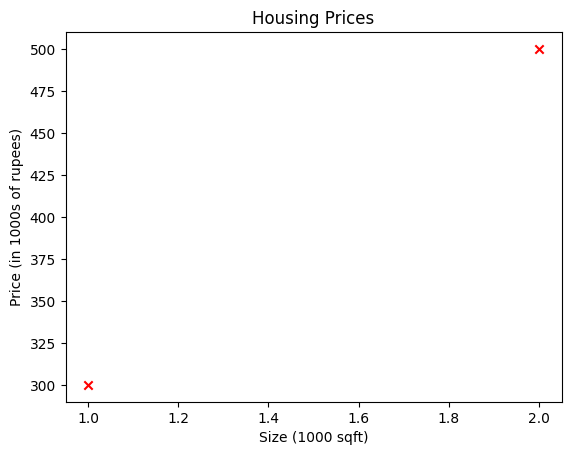

In [4]:
# plot training examples
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of rupees)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

In [5]:
def model_output(x, w, b):
  """computes the prediction of a linear model

  Args:
      x (ndarray(m,)): data with m examples
      w,b (scalar): model parameters

  Returns:
      yhat (ndarray(m,)): prediction of the linear model
  """
  # using loop (inefficient)
  
  # m = x.shape[0]
  # f_wb = np.zeros(m)
  # for i in range(m):
  #   f_wb[i] = w*x[i] + b
  
  # using numpy to compute f_wb (efficient)
  
  f_wb = w * x + b 
  return f_wb

In [6]:
# initialize model parameters
w = 100
b = 200

In [7]:
yhat = model_output(x_train, w, b)
print(yhat)

[300. 400.]


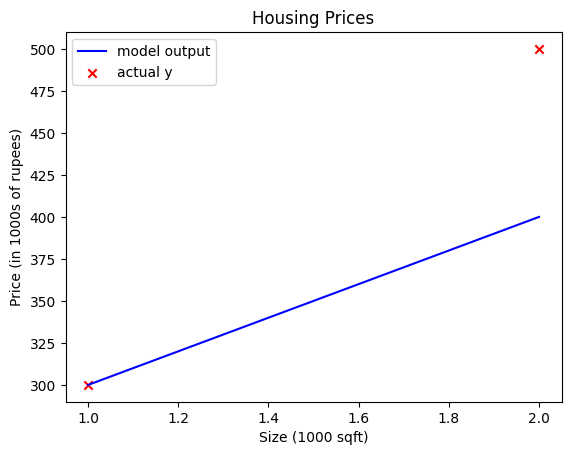

In [8]:
# plot actual y and model output
plt.plot(x_train, yhat, c='b', label='model output')
plt.scatter(x_train, y_train, marker='x', c='r', label='actual y')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of rupees)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

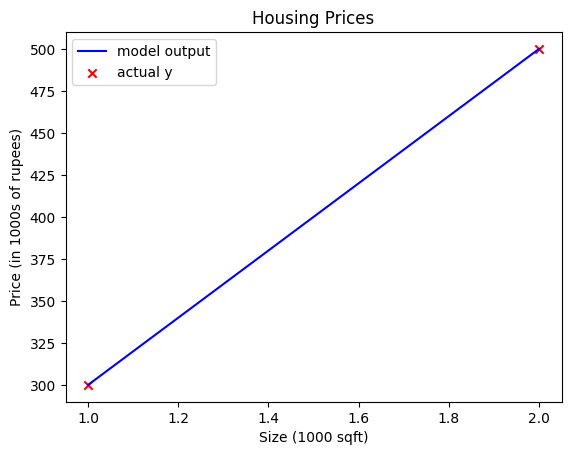

In [9]:
# try with different parameters
w = 200
b = 100
yhat = model_output(x_train, w, b)
plt.plot(x_train, yhat, c='b', label='model output')
plt.scatter(x_train, y_train, marker='x', c='r', label='actual y')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of rupees)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

best fit!

In [10]:
# prediction for a new data 
x_i = np.array([1.4])
cost = model_output(x_i, w, b)
print(cost)

[380.]


But, how would we find out the optimal values for the model parameters? Well, for that reason, we need to evaluate how good or bad is our
current model output and based on that we would update the model parameters.
So, let's write down the cost function for linear regression.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  

In [11]:
def compute_cost(x, y, w, b):
  """computes the cost function for linear regression

  Args:
      x (ndarray (m,)): data with m examples
      y (ndarray (m,)): target/actual values
      w,b (scalar): model parameters

  Returns:
      total_cost (scalar): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
  """
  y_hat = model_output(x,w,b)
  total_cost = 0
  total_cost = np.sum(np.square(y_hat-y))
  total_cost /= (2 * len(x))
  return total_cost

In [12]:
w = 100.0
b = 100.0
cost1 = compute_cost(x_train,y_train, w, b)
w = 200
b = 100
cost2 = compute_cost(x_train,y_train, w, b)
print(cost1, cost2)

12500.0 0.0


### Optimizers

How to automatically update w and b to its optimal or near optimal values?
This is where optimizers come into play. Optimizers are algorithms or methods used to change the parameters of your model such as weights and biases in order to reduce the losses.

In machine learning, we commonly use gradient descent optimization (GD) method and it's variants. GD is commonly used in deep learning models to update the weights of a neural network through backpropagation.

Some notations to be used:
- $t$ time step
- $w_t$ is the weight/parameter which we want to update where the subscript t means weight at time step t.
- $\alpha$ is the learning rate
- $\frac{\partial L}{\partial w}$ is gradient of the loss function L which we want to minimize with respect to the weight w.


Vanilla stochastic gradient descent (SGD) algorithm is a simple and very efficient approach to fit linear models. It is particularly useful when the number of samples (and the number of features) is very large. 

vanilla SGD updates weights by subtracting the current weight by a factor (learning rate) of the gradient.

$$ w_{t+1} = w_t - \alpha \frac{\partial L}{\partial w}$$

We do 3 types variations in the above equation:
1. Adapt the "gradient component" $\frac{\partial L}{\partial w}$ instead of using only single gradient like in SGD, take an aggregate of multiple gradients (specifically exponential moving average).
2. Adapt the "learning rate component" $\alpha$ Instead of keeping a constant learning rate, adapt the learning rate according to the magnitude of the gradient(s).
3. Both (1) and (2), adapt both the gradient and the learning rate.

##### Optimizer Table

The table below shows various optimizers, their year of introduction, and whether they use learning rate and/or gradients.

| Optimizer | Year | Learning Rate | Gradient |
|-----------|------|---------------|----------|
| Momentum  | 1964 |               | ✓        |
| AdaGrad   | 2011 | ✓             |          |
| RMSprop   | 2012 | ✓             |          |
| Adadelta  | 2012 | ✓             |          |
| Nesterov  | 2013 |               | ✓        |
| Adam      | 2014 | ✓             | ✓        |
| AdaMax    | 2015 | ✓             | ✓        |
| Nadam     | 2015 | ✓             | ✓        |
| AMSGrad   | 2018 | ✓             | ✓        |

Examples of optimizers:
- Stochastic Gradient Descent (SGD)
- Momentum
- AdaGrad (Adaptive Gradient algorithm)
- RMSprop (Root Mean Square Propagation)
- Adadelta (adaptive learning rate method)
- Nesterov Accelerated Gradient (NAG)
- Adam (Adaptive Moment Estimation)
- AdaMax (Adaptive Moment Estimation with infinity Norm)
- Nadam (Nesterov-accelerated Adaptive Moment Estimation)
- AMSGrad (Adaptive Moment Estimation with a gradient based maximum)

1. SGD: Stochastic Gradient Descent
$$ w_{t+1} = w_t - \alpha \frac{\partial L}{\partial w_t} $$

2. Momentum
Instead of depending only on the current gradient to update the weight, gradient descent with momentum replaces the current gradient with momentum ("m") which is an average of gradients. This aggregate is the exponential moving average of current and past gradients (up to time t). The momentum term is denoted by $\beta$.

$$ w_{t+1} = w_t - \alpha m_t $$
where,
$$ m_t = \beta m_{t-1} + (1-\beta) \frac{\partial L}{\partial w_t} $$

m is initialized to 0 and $\beta$ is a hyperparameter between 0 and 1. common default value of $\beta$ is 0.9.

3. AdaGrad: Adaptive Gradient Algorithm
AdaGrad acts on the learning rate component by dividing the learning rate by the square root of the cumulative sum of current and past squared of gradients. Note the gradient components remains unchanged like in SGD.

$$ w_{t+1} = w_t - \frac{\alpha}{\sqrt{v_t + \epsilon}} \cdot \frac{\partial L}{\partial w_t} $$

where,
$$ v_t = v_{t-1} + (\frac{\partial L}{\partial w_t})^2 $$
and $\epsilon$ is a small value to avoid division by zero.

default values in keras:
- $\alpha$ = 0.01
- $\epsilon$ = 1e-7

4. RMSprop: Root Mean Square Propagation
RMSprop (improvement to AdaGrad) is similar to AdaGrad but instead of accumulating all past squared gradients, RMSprop uses an exponential moving average of past squared gradients. The learning rate is divided by the square root of the moving average of the squared gradients.

$$ w_{t+1} = w_t - \frac{\alpha}{\sqrt{v_t + \epsilon}} \cdot \frac{\partial L}{\partial w_t} $$

where,
$$ v_t = \beta v_{t-1} + (1-\beta) (\frac{\partial L}{\partial w_t})^2 $$
and $\epsilon$ is a small value to avoid division by zero.

default values in keras:
- $\alpha$ = 0.001
- $\beta$ = 0.9
- $\epsilon$ = 1e-6

5. Adadelta: Adaptive Learning Rate Method
Like RMSprop, Adadelta is also another improvement from AdaGrad, focusing on learning rate component. Adadelta stands for adaptive delta, where delta is difference between current weight and the newly updated weight. 

The difference between Adadelta and RMSprop is that Adadelta removes the use of the learning rate component completely by replacing it with D, the exponential moving average of squared deltas.

$$ w_{t+1} = w_t - \frac{\sqrt{D_{t-1} + \epsilon}}{\sqrt{v_t + \epsilon}} \cdot \frac{\partial L}{\partial w_t} $$

where,
$$ D_t = \beta D_{t-1} + (1-\beta) [\triangle w_t]^2 $$

$$ v_t = \beta v_{t-1} + (1- \beta) [\frac{\partial L}{\partial w_t}]^2$$
with D and v initialized to 0 and 

$$ \triangle w_t = w_t - w_{t-1} $$

Default values from keras:
- $\beta$ = 0.95
- $\epsilon$ = 1e-6

6. Nesterov Accelerated Gradient (NAG)

Nesterov Accelerated Gradient (NAG) is an improved version of momentum-based gradient descent that helps prevent overshooting and improves convergence speed. Instead of computing the gradient at the current position, NAG looks ahead by applying momentum first and then computing the gradient. This helps in anticipating the direction, leading to smoother and more accurate updates.

Mathematical Update Rule:

Compute the look-ahead position:
$$ v_{t+1} = \gamma v_t - \alpha \nabla f(w_t + \beta v_t) $$

Update weights using the new velocity:
$$ w_{t+1} = w_t + v_{t+1} $$

Where:
- $ \nabla f(w_t + \beta v_t)$ = gradient at the lookahead position

---

Why NAG is Better than Momentum?
- **Momentum method** moves based on past gradients but may overshoot.  
- **NAG corrects overshooting** by computing gradients at the **future position**, leading to a more stable and adaptive update.  
- Works well in **non-convex** optimization problems.  

---

Use Case:
- Often used in deep learning for **faster convergence**, especially when dealing with **high-dimensional loss surfaces**.

7. Adam (Adaptive Moment Estimation) Optimizer

Adam combines ideas from **Momentum** and **AdaGrad** to provide an **adaptive learning rate** while maintaining the benefits of momentum. It computes **both** first-moment (mean) and second-moment (uncentered variance) estimates of the gradients.

Intuition Behind Adam:
- **Momentum** helps smooth out updates by accumulating past gradients, preventing erratic updates.  
- **AdaGrad** adapts the learning rate for each parameter based on the historical gradient magnitudes, improving performance for sparse data.  
- **Adam combines both**: It maintains moving averages of both gradients and squared gradients, normalizing updates based on past behavior.  

Thus, Adam can efficiently handle **sparse gradients**, **non-stationary objectives**, and **high-dimensional loss surfaces**—making it well-suited for **deep learning**.

---

Mathematical Update Rule:

1. Compute biased moment estimates:
- **First moment estimate (mean of gradients):**  
  $$
  m_{t+1} = \beta_1 m_t + (1 - \beta_1) \nabla f(w_t)
  $$
- **Second moment estimate (uncentered variance of gradients):**  
  $$
  v_{t+1} = \beta_2 v_t + (1 - \beta_2) [\nabla f(w_t)]^2
  $$

2. Bias correction (to adjust for initialization bias):
- **Corrected first moment estimate:**  
  $$
  \hat{m}_{t+1} = \frac{m_{t+1}}{1 - \beta_1^{t+1}}
  $$
- **Corrected second moment estimate:**  
  $$
  \hat{v}_{t+1} = \frac{v_{t+1}}{1 - \beta_2^{t+1}}
  $$

3. Parameter update:
  $$ w_{t+1} = w_t - \frac{\alpha}{\sqrt{\hat{v}_{t+1}} + \epsilon} \cdot \hat{m}_{t+1}
  $$

---

**Where:**
- $w_t$ = current weights  
- $ \nabla f(w_t)$ = gradient of the loss function  
- $ m_t $ = first moment estimate (exponential moving average of gradients)  
- $ v_t $ = second moment estimate (exponential moving average of squared gradients)  
- $ \beta_1 $ = decay rate for first moment (default **0.9**)  
- $ \beta_2 $ = decay rate for second moment (default **0.999**)  
- $ \alpha $ = learning rate  
- $ \epsilon $ = small value to prevent division by zero (default **1e-8**)  

---

**Why Adam is Better?**

**Combines Momentum and Adaptive Learning Rates** → Faster convergence  
**Bias Correction for Stability** → Adjusts initial values to prevent bias  
**Works Well for Sparse Data** → Adapts learning rate per parameter  
**Handles Non-Stationary Objectives** → Good for deep learning  

---

**Use Case:**
Adam is widely used in **deep learning** and **neural networks** due to its adaptability, efficiency, and ability to handle noisy gradients.

---

8. AdaMax Optimizer

Adamax is an adaptation of the Adam optimizer that replaces the L2 norm with the L-infinity norm. This modification helps stabilize the learning rate and improve convergence, especially in deep learning models. m is the exponential moving average of gradients, and v is the exponential moving average of past p-norm of gradients, approximated to the max function as below.

$$ w_{t+1} = w_t - \frac{\alpha}{v_t} \cdot \hat{m}_t $$

where,
$$ \hat{m}_t = \frac{m_t}{1-\beta_1^t} $$ 
is bias correction for m and 

$$m_t = \beta_1 m_{t-1} + (1-\beta_1) \frac{\partial L}{\partial w_t}$$
$$ v_t = max(\beta_2 v_{t-1}, | \frac{\partial L}{\partial w_t} |) $$

with m and v initialized to 0.
proposed default values:
- $\beta_1$ = 0.9
- $\beta_2$ = 0.999
- $\alpha$ = 0.002

9. Nadam Optimizer
Nadam is an improved version of Adam that includes Nesterov momentum and introduces a momentum term to the gradient. 

The update rule for adam can also be written as follows:
$$ w_{t+1} = w_t - \frac{\alpha}{\sqrt{\hat{v}_t} + \epsilon} \cdot (\beta_1 \hat{m}_{t-1} + \frac{1-\beta_1}{1-\hat{\beta}_1} \cdot \frac{\partial L}{\partial w_t}) $$

Nadam uses Nesterov to update the gradient one step ahead by replacing the previous $\hat{m}$ in the above equation to the current $\hat{m}$.

$$ w_{t+1} = w_t - \frac{\alpha}{\sqrt{\hat{v}_t} + \epsilon} \cdot (\beta_1 \hat{m}_{t} + \frac{1-\beta_1}{1-\hat{\beta}_1} \cdot \frac{\partial L}{\partial w_t}) $$

where,
$$ \hat{m}_t = \frac{\beta_1 m_t}{1-\hat{\beta}_1} $$
$$ \hat{v}_t = \frac{v_t}{1-\hat{\beta}_2} $$

and 

$$m_t = \beta_1 m_{t-1} + (1-\beta_1) \frac{\partial L}{\partial w_t}$$
$$ v_t = \beta_2 v_{t-1} + (1-\beta_2) (\frac{\partial L}{\partial w_t})^2 $$
with m and v initialized to 0.
proposed default values:
- $\beta_1$ = 0.9
- $\beta_2$ = 0.999
- $\alpha$ = 0.002
- $\epsilon$ = 1e-7

10. AMSGrad 
Another variant of Adam is the AMSGrad. this variant revisits the adaptive learning rate component in Adam and changes it to ensure that the current v is always larger than the v from the previous time step.

$$w_{t+1} = w_t - \frac{\alpha}{\sqrt{\hat{v}_t}+\epsilon} \cdot m_t $$

where, 
$$ \hat{v}_t = max(\hat{v}_{t-1}, v_t) $$

and 

$$m_t = \beta_1 m_{t-1} + (1-\beta_1) \frac{\partial L}{\partial w_t}$$
$$ v_t = \beta_2 v_{t-1} + (1-\beta_2) (\frac{\partial L}{\partial w_t})^2 $$
with m and v initialized to 0.
proposed default values:
- $\beta_1$ = 0.9
- $\beta_2$ = 0.999
- $\alpha$ = 0.001
- $\epsilon$ = 1e-7

#### gradient descent

In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 


*gradient descent* is described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [ ]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """
    m = len(x) 
    yhat = model_output(x, w, b)
    dj_dw = np.sum(((yhat - y)*x))/m
    dj_db = np.sum((yhat - y))/m
    return dj_dw, dj_db
  

In [ ]:
w = 10
b = 5
print(compute_gradient(x_train,y_train, w, b))
# print(compute_gradient2(x_train,y_train, w, b))

(np.float64(-617.5), np.float64(-380.0))
(np.float64(-617.5), np.float64(-380.0))


In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
      Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    w = w_in   
    b = b_in
    J_history = []
    p_history = []
    for iteration in range(num_iters):
      if iteration < 100000:
        J_history.append(cost_function(x, y, w, b))
        p_history.append([w,b])
      dj_dw, dj_db = gradient_function(x, y, w, b)
      w_new = w - alpha * dj_dw
      b_new = b - alpha * dj_db
      w = w_new
      b = b_new
    return w, b, J_history, p_history
      
      

In [35]:
w = 10 
b = 5
alpha = 0.001
w_final, b_final, J, P = gradient_descent(x_train, y_train, w, b, alpha, 100000, compute_cost, compute_gradient)

for i in range(len(J)):
  if i % 1000 == 0:
    print(f"iteration {i} cost {J[i]} w = {P[i][0]} b = {P[i][1]}")
    
print(f"final w = {w_final} b = {b_final}")

iteration 0 cost 76712.5 w = 10 b = 5
iteration 1000 cost 91.45198486405117 w = 184.86459106463505 b = 111.49446411698618
iteration 2000 cost 9.99818806064368 w = 191.1444963776733 b = 113.90886715015388
iteration 3000 cost 8.568855041739663 w = 191.93592338786138 b = 113.03439908724691
iteration 4000 cost 7.4054826927453945 w = 192.50870355718314 b = 112.12073467715295
iteration 5000 cost 6.400123342858553 w = 193.03592369640435 b = 111.26809802891633
iteration 6000 cost 5.531250426705537 w = 193.52588172207174 b = 110.4753429645716
iteration 7000 cost 4.780334634881736 w = 193.98136363144297 b = 109.7383581955164
iteration 8000 cost 4.131362252397542 w = 194.4048002761625 b = 109.05322332653726
iteration 9000 cost 3.5704935667037567 w = 194.7984463482256 b = 108.41629060286168
iteration 10000 cost 3.085767727696624 w = 195.1643977465226 b = 107.82416880220171
iteration 11000 cost 2.66684767565203 w = 195.50460290919258 b = 107.27370528585391
iteration 12000 cost 2.30479969742869 w = 

Note: the final values of w and b approaches towards our original optimal values of w = 200 and b = 100.

In [36]:
x_test = np.array([3,2,1.4])
y_pred = model_output(x_test, w_final, b_final)
print(f"predicted housing prices: {y_pred}")

predicted housing prices: [699.99059147 499.99739955 380.00148439]


##### multiple linear regression

$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$

$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$ 

shape of $\mathbf{X}$ is $(m,n)$ and shape of $\mathbf{w}$ is $(n,1)$ and $b$ is bias (scalar). $m$ is the number of data points/examples, superscript on $\mathbf{X}$ denotes the nth data point and subscript denotes the nth feature.

The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`



dataset:

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

here m = 3 (number of examples/records)

n = 4 (feature counts)

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [3]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


In [ ]:
def predict(X, w, b):
  """ prediction using linear regression

  Args:
      X (ndarray): Shape (m,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar): model parameter 
      
  Returns:
      pred (scalar): predicted value
  """
  pred = np.dot(X, w) + b
  return pred

Compute Cost With Multiple Variables

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 

In [15]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    yhat = predict(X,w,b)
    cost = np.sum(np.square(yhat-y))/(2*m)
    return cost

In [17]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [ ]:
cost = compute_cost(X_train, y_train, w_init, b_init)

1.5578904342585886e-12 1.5578904880036537e-12


In [28]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression in a vectorized way.
    
    Args:
      X (ndarray (m, n)): Feature dataset with m examples and n features
      y (ndarray (m, )): Target values
      w (ndarray (n, )): Model weights
      b (scalar)        : Bias

    Returns:
      dj_dw (ndarray (n, )): Gradient of the cost function w.r.t. w
      dj_db (scalar)        : Gradient of the cost function w.r.t. b
    """
    m = X.shape[0]  # Number of examples


    yhat = predict(X, w, b)  # Shape (m, )

    # Compute gradients
    dj_dw = (1/m) * np.dot(X.T, (yhat - y))  # Shape (n, )
    dj_db = (1/m) * np.sum(yhat - y)         # Scalar

    return dj_dw, dj_db


In [29]:
#Compute and display gradient 
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251122999121e-06
dj_dw at initial w,b: 
 [-2.72623574e-03 -6.27197255e-06 -2.21745574e-06 -6.92403377e-05]


In [42]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, batch_size=1):
    """
    Performs batch gradient descent to minimize the cost function.
    
    Args:
      X (ndarray (m, n)): Feature dataset with m examples and n features
      y (ndarray (m, )): Target values
      w_in (ndarray (n, )): Initial model weights
      b_in (scalar): Initial bias
      cost_function (function): Function to compute cost
      gradient_function (function): Function to compute the gradient
      alpha (float): Learning rate
      num_iters (int): Number of iterations to perform
      batch_size (int): Size of the mini-batch for gradient descent

    Returns:
      w_out (ndarray (n, )): Final model weights
      b_out (scalar): Final bias
      J_history (list): Cost function values at each iteration
      P_history (list): Model parameters at each iteration (w, b)
    """
    J_history = []
    P_history = []
    w = np.copy(w_in)  # Copy to avoid modifying input
    b = b_in
    m = X.shape[0]

    for i in range(num_iters):
        indices = np.random.permutation(m)  # Shuffle dataset indices
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for batch_start in range(0, m, batch_size):
            batch_end = min(batch_start + batch_size, m)  # Ensure valid indexing
            curr_batch_x = X_shuffled[batch_start:batch_end]
            curr_batch_y = y_shuffled[batch_start:batch_end]

            # Compute gradients using mini-batch
            dj_dw, dj_db = gradient_function(curr_batch_x, curr_batch_y, w, b)

            # Update parameters
            w -= alpha * dj_dw
            b -= alpha * dj_db

        # Store cost and parameters after full epoch
        J_history.append(cost_function(X, y, w, b))
        P_history.append((np.copy(w), b))

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {J_history[-1]:.4f}")

    return w, b, J_history, P_history

In [43]:
initial_w = np.zeros_like(w_init)
initial_b = 0.

iterations = 1000
alpha = 5.0e-7

w_final, b_final, J_hist, P_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations,1)
print(f'w_final: {w_final}')
print(f'b_final: {b_final}')

Iteration 0: Cost 2528.6664
Iteration 100: Cost 2450.0651
Iteration 200: Cost 2430.0382
Iteration 300: Cost 8672.3421
Iteration 400: Cost 5038.3577
Iteration 500: Cost 2412.2284
Iteration 600: Cost 1164.7266
Iteration 700: Cost 2362.6114
Iteration 800: Cost 8199.0700
Iteration 900: Cost 4588.8453
w_final: [ 0.28977382  0.0146274  -0.05008752 -0.3504826 ]
b_final: -0.011841052177036996


#### normalization

Why do we need to normalize the data?

We normalize data in machine learning to:

1. **Improve Convergence** – Gradient descent converges faster when features are on a similar scale.
2. **Avoid Feature Dominance** – Large-scale features can dominate smaller ones, leading to biased models.
3. **Enhance Numerical Stability** – Prevents issues like exploding gradients in deep learning.
4. **Optimize Distance-Based Models** – Algorithms like k-NN, SVM, and K-means rely on distance calculations, which are affected by scale differences.

Common techniques: Min-Max Scaling, Standardization (Z-score), and Mean Normalization.


In [5]:
# min-max-scaling
def min_max_scaling(X, range=(0,1)):
  """
  Applies Min-Max Scaling to scale features to a given range (default: 0 to 1).

  Args:
      X (ndarray (m, n)): Input feature matrix with m examples and n features.
      feature_range (tuple): Desired range of transformed data (min, max).

  Returns:
      X_scaled (ndarray (m, n)): Scaled feature matrix.
  """
  X_min = np.min(X, axis=0)
  X_max = np.max(X, axis=0)
  epsilon = 1e-8  # To avoid division by zero
  X_scaled = ((X-X_min)/(X_max-X_min + epsilon))*(range[1]-range[0]) + range[0]
  return X_scaled

In [6]:
def mean_normalization(X):
    """
    Applies Mean Normalization to scale features between -1 and 1.

    Args:
        X (ndarray (m, n)): Input feature matrix with m examples and n features.

    Returns:
        X_normalized (ndarray (m, n)): Mean normalized feature matrix.
    """
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    mean = np.mean(X, axis=0)
    epsilon = 1e-8  # To avoid division by zero
    X_normalized = (X - mean) / (X_max - X_min + epsilon)
    return X_normalized

In [7]:
def standardization(X):
    """
    Applies Standardization (Z-score normalization) to scale features to have zero mean and unit variance.

    Args:
        X (ndarray (m, n)): Input feature matrix with m examples and n features.

    Returns:
        X_standardized (ndarray (m, n)): Standardized feature matrix.
    """
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_standardized = (X - mean) / std
    return X_standardized

In [8]:
x_dummy = np.arange(40).reshape(10,4)
x_min_mx = min_max_scaling(x_dummy)
x_mean_norm = mean_normalization(x_dummy)
x_std = standardization(x_dummy)

In [9]:
print(f"xminmx shape: {x_min_mx.shape}, x_mean_norm shape: {x_mean_norm.shape}, x_std shape: {x_std.shape}")

xminmx shape: (10, 4), x_mean_norm shape: (10, 4), x_std shape: (10, 4)


linear regression using scikit learn (open source machine learning library)

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor # stochastic gradient descent regressor
from sklearn.preprocessing import  StandardScaler

In [31]:
# read csv data using numpy 
data = np.loadtxt('data/houses.txt', delimiter=',')
print(data.shape)

(100, 5)


In [32]:
X_train = data[:, :4]
y_train = data[:, 4]
X_features = ['size(sqft)','bedrooms', 'floors', 'age']

In [33]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [34]:
print(X_train.shape, y_train.shape)

(100, 4) (100,)


In [35]:
# normalization
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

# fit the regression model using SGD
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)


SGDRegressor()

In [37]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w_norm}, b: {b_norm}")

model parameters: w: [110.16483037 -21.27931682 -32.4248376  -37.86291149], b: [362.23402329]


In [38]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[248.67186019 295.57903789 485.68866377 389.64271857]
Target values 
[271.5 300.  509.8 394. ]


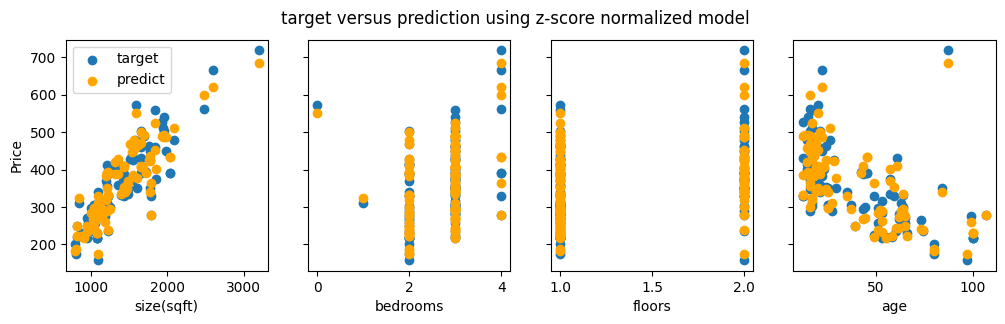

In [40]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color='orange', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()